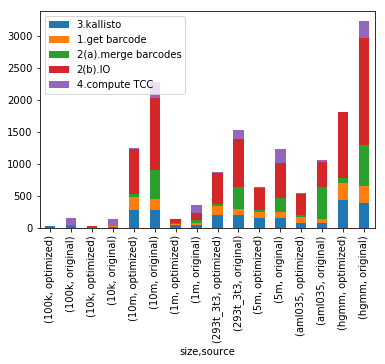

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

df = pd.read_csv("runs_time.csv")
ka = df['3.kallisto']
df = df.drop('3.kallisto', axis=1)
df.insert(0, '3.kallisto', ka)
df = df.drop('all', axis=1)

var = df.groupby(['size', 'source']).sum().stack()
var.unstack().plot(kind='bar', stacked=True)
plt.show()

['100k' '10k' '10m' '1m' '293t_3t3' '5m' 'aml035' 'hgmm']


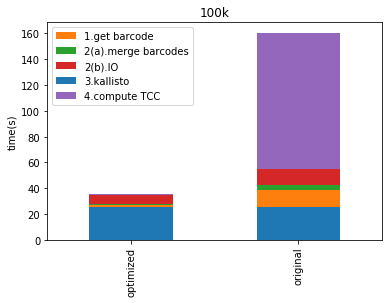

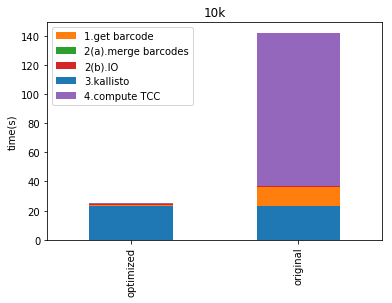

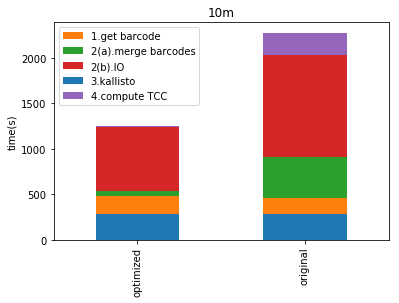

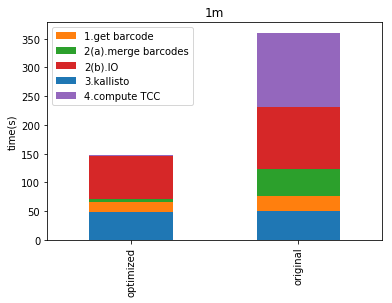

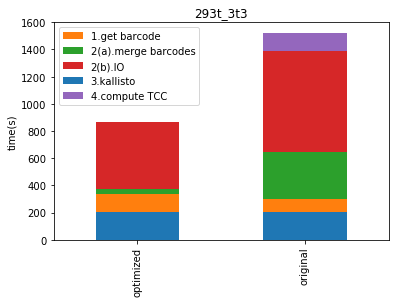

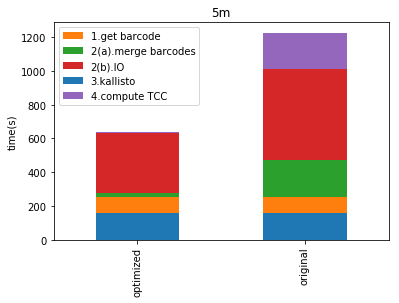

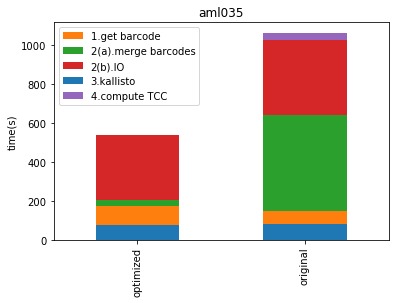

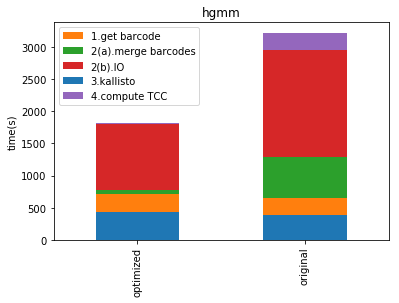

In [27]:

sz = df.ix[:, 'size']
sz = list(sz)
sz = np.unique(sz)
print sz
for size in sz:
    data = df[df['size'] == size]
    data = data.drop('size', axis=1)
    var = data.groupby('source').sum().stack()
    ax = var.unstack().plot(kind='bar', stacked=True, title=size)

    plt.ylabel("time(s)")
    plt.xlabel("")
    handles, labels = ax.get_legend_handles_labels()

    ax.legend(handles[::-1], labels[::-1])
    import operator
    hl = sorted(zip(handles, labels),
            key=operator.itemgetter(1))
    handles2, labels2 = zip(*hl)

    ax.legend(handles2, labels2)
plt.show()

C:\Users\MrD_s\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\MrD_s\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


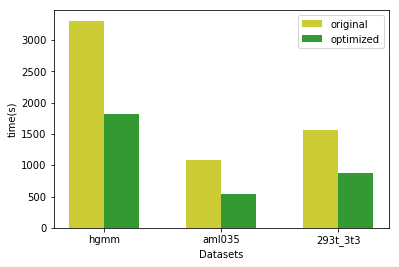

In [28]:
df = pd.read_csv("runs_time.csv")
sets = ['hgmm','aml035','293t_3t3']
index = np.arange(3)+1
bar_width = 0.3
opacity = 0.8
cpp_time = []
py_time = []
for dataset in sets:
    data = df[df['size'] == dataset]
    cpp_time = cpp_time + list(data[df['source']=='optimized']['all'])
    py_time = py_time + list(data[df['source']=='original']['all'])
fig, ax = plt.subplots()
rects_py = plt.bar(index, py_time, bar_width,
                  alpha=opacity,
                  color='y',
                  label='original')
rects_cpp = plt.bar(index+bar_width, cpp_time, bar_width,
                  alpha=opacity,
                  color='g',
                  label='optimized')

plt.xlabel('Datasets')
plt.ylabel('time(s)')
plt.xticks(index + bar_width/2, sets)
plt.legend()
plt.show()

C:\Users\MrD_s\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\MrD_s\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


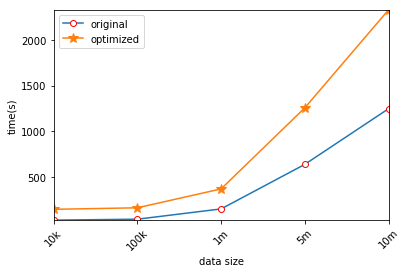

In [29]:
df = pd.read_csv("runs_time.csv")
szs = ['10k', '100k', '1m', '5m', '10m']
x = range(len(szs))
y = []
y1 = []
for size in szs:
    data = df[df['size'] == size]
    y = y + list(data[df['source']=='optimized']['all'])
    y1 = y1 + list(data[df['source']=='original']['all'])

plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'original')
plt.plot(x, y1, marker='*', ms=10,label=u'optimized')
plt.legend()
plt.xticks(x, szs, rotation=45)
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"data size")
plt.ylabel("time(s)")
plt.title("")

plt.show()

In [30]:
df = pd.read_csv("runs_time.csv")
sets = ['hgmm','aml035','293t_3t3']
print 'dataset\tpython\tcpp\timprov'
for dataset in sets:
    data = df[df['size'] == dataset]
    cpp = int(data[df['source']=='optimized']['all'])
    py = int(data[df['source']=='original']['all'])
    print dataset+'\t'+str(py)+'\t'+str(cpp)+'\t'+str((py)*100.0/cpp)+'%'

dataset	python	cpp	improv
hgmm	3305	1816	181.99339207%
aml035	1088	539	201.85528757%
293t_3t3	1564	868	180.184331797%


C:\Users\MrD_s\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\MrD_s\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [31]:
df = pd.read_csv("runs_ram.csv")
sets = ['hgmm','aml035','293t_3t3']
print 'dataset\tpython\tcpp\timprov'
for dataset in sets:
    data = df[df['size'] == dataset]
    cpp = int(data[df['source']=='optimized']['ram'])
    py = int(data[df['source']=='original']['ram'])
    print dataset+'\t'+str((py+0.0)/(1<<20))+'\t'+str((cpp+0.0)/(1<<20))+'\t'+str((py-cpp)*100.0/py)+'%'

dataset	python	cpp	improv
hgmm	31.3064231873	22.6197547913	27.7472400601%
aml035	10.2390289307	11.3638801575	-10.9859170672%
293t_3t3	15.858379364	11.3114700317	28.6719672162%


C:\Users\MrD_s\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\MrD_s\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
